# Naive Bayes On The Iris Dataset

In [1]:
from csv import reader
from math import sqrt
from math import exp
from math import pi
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Split the dataset by class values, returns a dictionary

In [2]:
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

## Calculate the mean of a list of numbers

In [3]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

## Calculate the standard deviation of a list of numbers

In [7]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

## Calculate the mean, stdev and count for each column in a dataset

In [8]:
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

## Split dataset by class then calculate statistics for each row

In [9]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

## Calculate the Gaussian probability distribution function for x

In [10]:
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

## Calculate the probabilities of predicting each class for a given row

In [11]:
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

## Predict the class for a given row

In [13]:
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Make a prediction with Naive Bayes Classifier Model on Iris Dataset

## load dataset

In [14]:
filename = '../../images/prob/iris.csv'   
dataset = pd.read_csv(filename)

In [53]:
print(dataset.as_matrix())

[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]
 [5.4 3.9 1.7 0.4 1. ]
 [4.6 3.4 1.4 0.3 1. ]
 [5.  3.4 1.5 0.2 1. ]
 [4.4 2.9 1.4 0.2 1. ]
 [4.9 3.1 1.5 0.1 1. ]
 [5.4 3.7 1.5 0.2 1. ]
 [4.8 3.4 1.6 0.2 1. ]
 [4.8 3.  1.4 0.1 1. ]
 [4.3 3.  1.1 0.1 1. ]
 [5.8 4.  1.2 0.2 1. ]
 [5.7 4.4 1.5 0.4 1. ]
 [5.4 3.9 1.3 0.4 1. ]
 [5.1 3.5 1.4 0.3 1. ]
 [5.7 3.8 1.7 0.3 1. ]
 [5.1 3.8 1.5 0.3 1. ]
 [5.4 3.4 1.7 0.2 1. ]
 [5.1 3.7 1.5 0.4 1. ]
 [4.6 3.6 1.  0.2 1. ]
 [5.1 3.3 1.7 0.5 1. ]
 [4.8 3.4 1.9 0.2 1. ]
 [5.  3.  1.6 0.2 1. ]
 [5.  3.4 1.6 0.4 1. ]
 [5.2 3.5 1.5 0.2 1. ]
 [5.2 3.4 1.4 0.2 1. ]
 [4.7 3.2 1.6 0.2 1. ]
 [4.8 3.1 1.6 0.2 1. ]
 [5.4 3.4 1.5 0.4 1. ]
 [5.2 4.1 1.5 0.1 1. ]
 [5.5 4.2 1.4 0.2 1. ]
 [4.9 3.1 1.5 0.2 1. ]
 [5.  3.2 1.2 0.2 1. ]
 [5.5 3.5 1.3 0.2 1. ]
 [4.9 3.6 1.4 0.1 1. ]
 [4.4 3.  1.3 0.2 1. ]
 [5.1 3.4 1.5 0.2 1. ]
 [5.  3.5 1.3 0.3 1. ]
 [4.5 2.3 1.3 0.3 1. ]
 [4.4 3.2 1.3 0.2 1. ]
 [5.  3.5 1

E:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [15]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
dataset.variety.value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

## preprocess dataset

In [17]:
label_map = {"Virginica":0, "Setosa":1, "Versicolor":2}

In [18]:
dataset.variety = dataset.variety.apply(lambda x: label_map[x])

In [55]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [21]:
data = dataset.as_matrix()

E:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [22]:
data.shape

(150, 5)

## fit model on full data (we aren't splitting data in train/val/test parts here)

In [23]:
model = summarize_by_class(data)

In [52]:
model

{1.0: [(5.005999999999999, 0.3524896872134512, 50),
  (3.428000000000001, 0.3790643690962886, 50),
  (1.4620000000000002, 0.1736639964801841, 50),
  (0.2459999999999999, 0.10538558938004569, 50)],
 2.0: [(5.936, 0.5161711470638635, 50),
  (2.7700000000000005, 0.3137983233784114, 50),
  (4.26, 0.46991097723995806, 50),
  (1.3259999999999998, 0.197752680004544, 50)],
 0.0: [(6.587999999999998, 0.635879593274432, 50),
  (2.9739999999999998, 0.3224966381726376, 50),
  (5.552, 0.5518946956639835, 50),
  (2.026, 0.27465005563666733, 50)]}

In [50]:
import numpy as np
import math
s = [(mean(column), stdev(column), len(column)) for column in zip(*data)]
print(s)
print(s[-1])

[(5.843333333333335, 0.8280661279778629, 150), (3.057333333333334, 0.435866284936698, 150), (3.7580000000000027, 1.7652982332594667, 150), (1.199333333333334, 0.7622376689603465, 150), (1.0, 0.8192319205190405, 150)]
(1.0, 0.8192319205190405, 150)


## Test Model on full data

In [25]:
predictions = [predict(model, data[row_idx, :4]) for row_idx in range(data.shape[0])]

In [51]:
predictions

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
targets = data[:, 4]

In [31]:
len(targets)

150

### Get Scores

In [32]:
f1 = f1_score(y_true=targets, y_pred=predictions, average='macro')
precision = precision_score(y_true=targets, y_pred=predictions, average='macro')
recall = recall_score(y_true=targets, y_pred=predictions, average='macro')

In [33]:
print(f"Scores:\nf1: {f1}\nprecision:{precision}\nrecall:{recall}")

Scores:
f1: 0.96
precision:0.96
recall:0.96


### Confusion Matrix

In [34]:
label_keys = ["Virginica", "Setosa", "Versicolor"]

In [35]:
label_values = [0,1,2]

In [36]:
conf_matrix = confusion_matrix(y_true=targets, y_pred=predictions, labels=label_values)

In [37]:
conf_matrix_df = pd.DataFrame(conf_matrix, columns=label_keys, index=label_keys)

In [38]:
conf_matrix_df

,Virginica,Setosa,Versicolor
Virginica,47,0,3
Setosa,0,50,0
Versicolor,3,0,47


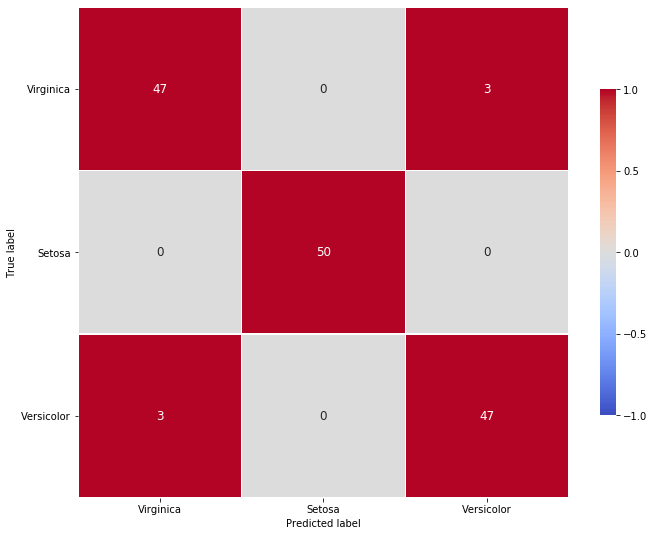

In [39]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(conf_matrix_df, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(conf_matrix_df.columns, rotation = 0)
ax.set_xticklabels(conf_matrix_df.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
ax.set(ylabel='True label',
           xlabel='Predicted label');

## define a new record

In [40]:
row = [5.7,2.9,4.2,1.3]

## predict the label

In [30]:
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

Data=[5.7, 2.9, 4.2, 1.3], Predicted: 2.0


# More Resources

[all about naive bayes](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf)

[naive bayes classifier (wiki)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[naive bayes explained (towardsdatascience)](https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0)